In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("path_to_crime_dataset.csv")

df.head()

,State,AMI%,SMI%,DrugUse%,ViolentCrimePer100k,FacilitiesCount,MHClients,Population,Facilities_per_100k
0,Alaska,25.2,6.8,17.5,837,54,6000,733391,7.36
1,California,20.5,4.8,15.0,442,630,50000,39538223,1.59
2,Florida,19.3,4.1,14.2,384,420,43000,21538187,1.95
3,New Mexico,22.1,5.6,18.9,778,73,7800,2117522,3.45
4,Oregon,26.7,7.2,19.1,292,110,10500,4237256,2.60


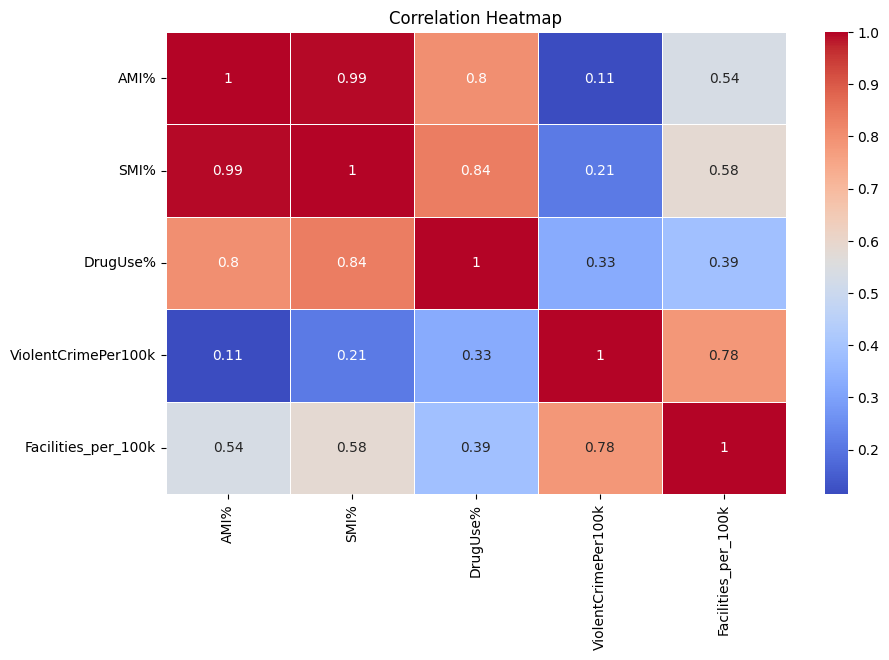

In [15]:
plt.figure(figsize=(10, 6))
corr = df[['AMI%', 'SMI%', 'DrugUse%', 'ViolentCrimePer100k', 'Facilities_per_100k']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

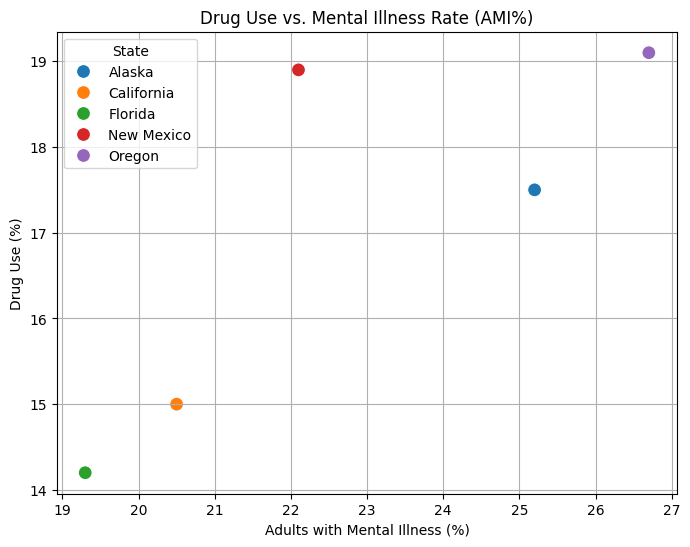

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AMI%', y='DrugUse%', hue='State', s=100)
plt.title('Drug Use vs. Mental Illness Rate (AMI%)')
plt.xlabel('Adults with Mental Illness (%)')
plt.ylabel('Drug Use (%)')
plt.grid(True)
plt.show()

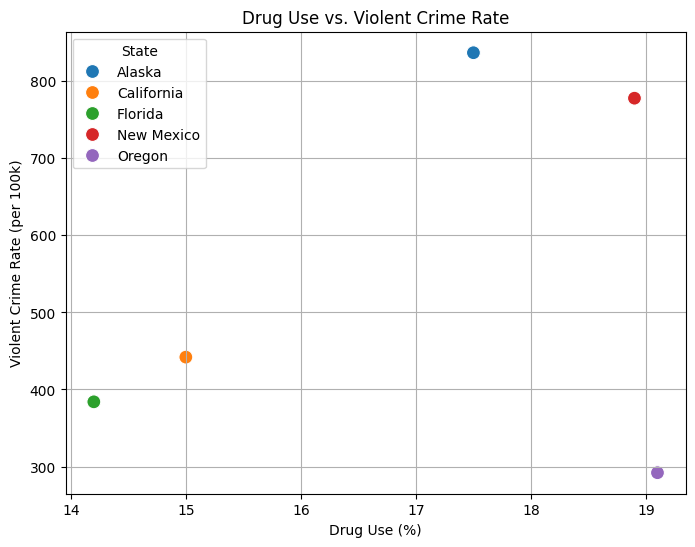

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='DrugUse%', y='ViolentCrimePer100k', hue='State', s=100)
plt.title('Drug Use vs. Violent Crime Rate')
plt.xlabel('Drug Use (%)')
plt.ylabel('Violent Crime Rate (per 100k)')
plt.grid(True)
plt.show()

<ipython-input-18-6d7890af3185>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Facilities_per_100k', data=df, palette='viridis')


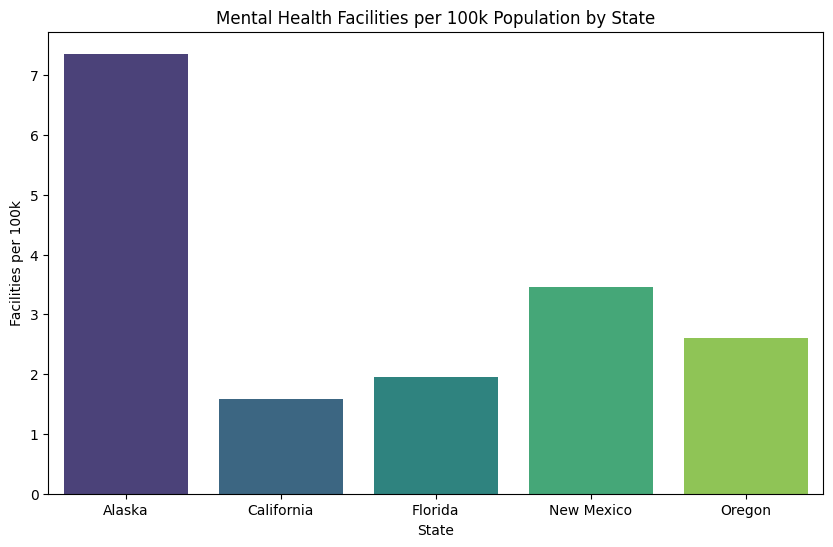

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Facilities_per_100k', data=df, palette='viridis')
plt.title('Mental Health Facilities per 100k Population by State')
plt.xlabel('State')
plt.ylabel('Facilities per 100k')
plt.show()

In [31]:
# Hypothesis 1: Service Access - Drug Use

In [32]:
from scipy.stats import ttest_ind
import numpy as np

threshold = df['Facilities_per_100k'].mean()
high_access = df[df['Facilities_per_100k'] >= threshold]['DrugUse%']
low_access = df[df['Facilities_per_100k'] < threshold]['DrugUse%']

t_stat, p_val = ttest_ind(high_access, low_access)

print("T-test Result: Service Access → Drug Use")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

T-test Result: Service Access → Drug Use
T-statistic: 1.04
P-value: 0.3765


<ipython-input-29-127e2bbdcda5>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='AccessLevel', y='DrugUse%', ci=None, palette='pastel')
<ipython-input-29-127e2bbdcda5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AccessLevel', y='DrugUse%', ci=None, palette='pastel')


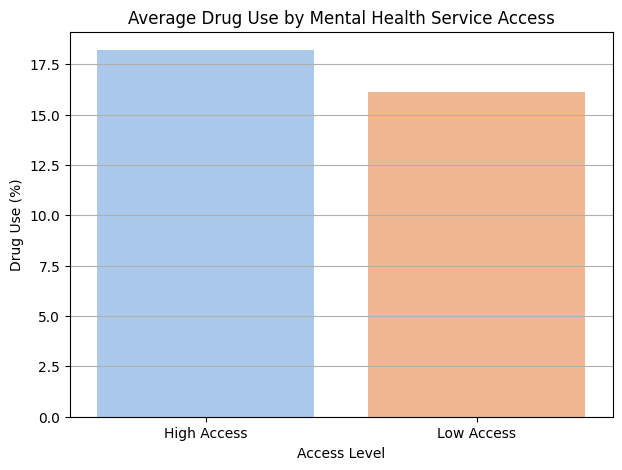

In [29]:
df['AccessLevel'] = np.where(df['Facilities_per_100k'] >= threshold, 'High Access', 'Low Access')

plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='AccessLevel', y='DrugUse%', ci=None, palette='pastel')
plt.title("Average Drug Use by Mental Health Service Access")
plt.xlabel("Access Level")
plt.ylabel("Drug Use (%)")
plt.grid(axis='y')
plt.show()

<ipython-input-34-158901fa941a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


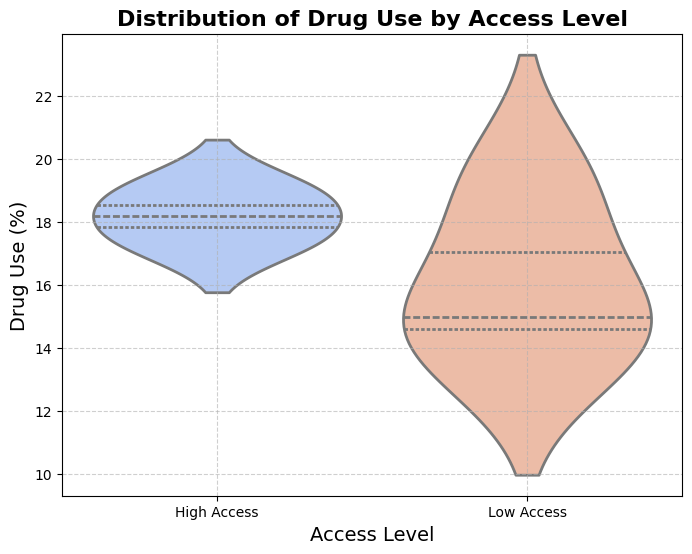

In [34]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df,
    x='AccessLevel',
    y='DrugUse%',
    palette='coolwarm',
    inner='quartile',
    linewidth=2
)
plt.title('Distribution of Drug Use by Access Level', fontsize=16, fontweight='bold')
plt.xlabel('Access Level', fontsize=14)
plt.ylabel('Drug Use (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [35]:
# Hypothesis 2: Untreated Mental Illness - Drug Use / Crime

In [37]:
r1 = df['AMI%'].corr(df['DrugUse%'])
r2 = df['AMI%'].corr(df['ViolentCrimePer100k'])

print(f"Correlation (AMI% vs Drug Use): {r1:.2f}")
print(f"Correlation (AMI% vs Crime): {r2:.2f}")

Correlation (AMI% vs Drug Use): 0.80
Correlation (AMI% vs Crime): 0.11


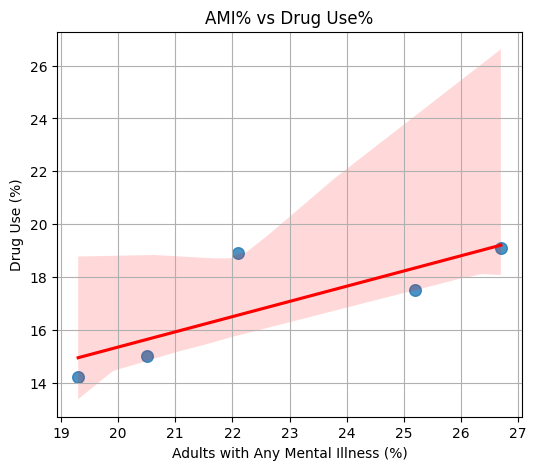

In [38]:
plt.figure(figsize=(6,5))
sns.regplot(x='AMI%', y='DrugUse%', data=df, scatter_kws={"s": 70}, line_kws={"color": "red"})
plt.title('AMI% vs Drug Use%')
plt.xlabel('Adults with Any Mental Illness (%)')
plt.ylabel('Drug Use (%)')
plt.grid(True)
plt.show()

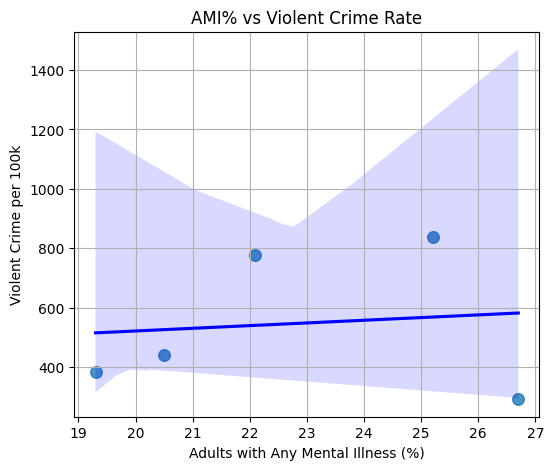

In [39]:
plt.figure(figsize=(6,5))
sns.regplot(x='AMI%', y='ViolentCrimePer100k', data=df, scatter_kws={"s": 70}, line_kws={"color": "blue"})
plt.title('AMI% vs Violent Crime Rate')
plt.xlabel('Adults with Any Mental Illness (%)')
plt.ylabel('Violent Crime per 100k')
plt.grid(True)
plt.show()

In [40]:
# Hypothesis 3: Severe Mental Illness - Crime

In [45]:
r3 = df['SMI%'].corr(df['ViolentCrimePer100k'])
print(f"Correlation (SMI% vs Violent Crime Rate): {r3:.2f}")

Correlation (SMI% vs Violent Crime Rate): 0.21


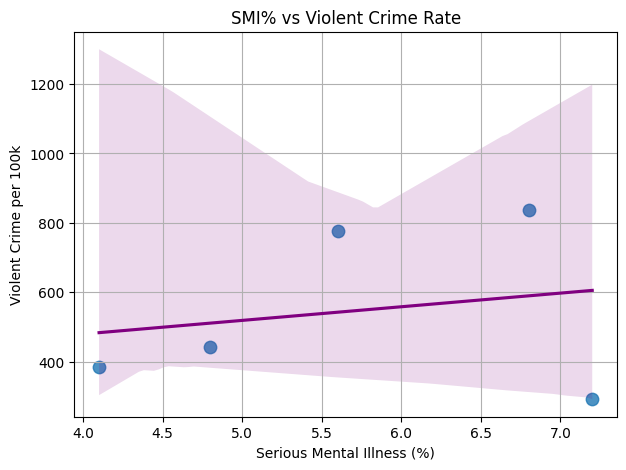

In [46]:
plt.figure(figsize=(7,5))
sns.regplot(x='SMI%', y='ViolentCrimePer100k', data=df, scatter_kws={"s": 80}, line_kws={"color": "purple"})
plt.title('SMI% vs Violent Crime Rate')
plt.xlabel('Serious Mental Illness (%)')
plt.ylabel('Violent Crime per 100k')
plt.grid(True)
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression

X = df[['SMI%', 'DrugUse%']]
y = df['ViolentCrimePer100k']

model = LinearRegression()
model.fit(X, y)

print("Regression Model Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"SMI% Coefficient: {model.coef_[0]:.2f}")
print(f"Drug Use% Coefficient: {model.coef_[1]:.2f}")

Regression Model Coefficients:
Intercept: -154.11
SMI% Coefficient: -38.43
Drug Use% Coefficient: 54.29


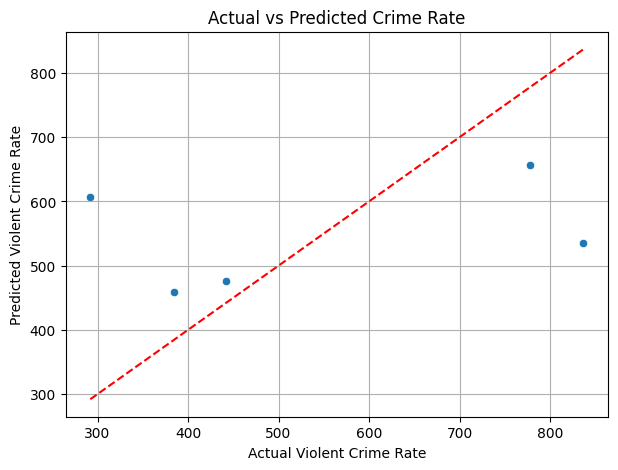

In [48]:
y_pred = model.predict(X)

plt.figure(figsize=(7,5))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Violent Crime Rate')
plt.ylabel('Predicted Violent Crime Rate')
plt.title('Actual vs Predicted Crime Rate')
plt.grid(True)
plt.show()